# Homework week 1
## Trương Minh Hiếu - 21002145

Library

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import numpy as np


## 1, read and convert data from txt to csv

In [2]:

with open('data.txt', 'r') as file:
    lines = file.readlines()
    data = [line.strip() for line in lines if line.strip() and '#####' not in line]
# convert the list of strings to a list of lists
data = [line.split(',') for line in data]

columns = ['id', 'class', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'margin_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses']
df = pd.DataFrame(data, columns=columns)

df.to_csv('datacum.csv', index=False)
print('convert complete')

convert complete


check if the class only contains 2 (u lành tính|B–benign) and 4 (u ác tính|M–malignant).

In [6]:
def check_class_values(csv_file_path):
    # read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # check if the 'class' column only contains 2 and 4
    valid_values = set([2, 4])
    class_column_values = set(df['class'])

    if class_column_values.issubset(valid_values):
        print("The 'class' column contains only 2 and 4.")
    else:
        print("The 'class' column contains values other than 2 and 4.")


In [7]:
check_class_values("datacum.csv")

The 'class' column contains only 2 and 4.


## 2, choose 80 samples of B–benign and 40 samples of M–malignant

In [8]:
# load the data
file_path = 'datacum.csv'
data = pd.read_csv(file_path)

# creating 80 samples Benign tumors (B–benign) and 40 samples malignant tumors (M–malignant).
samples_benign = data[data['class'] == 2].sample(n=80, random_state=1)
samples_malignant = data[data['class'] == 4].sample(n=40, random_state=1)
test_data = pd.concat([samples_benign, samples_malignant])
train_data = data.drop(test_data.index)

# remove 'class' column for training and testing data
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

## 3, training model 

Observed data are continuous variables so the ideal model is GAUSSIAN NAÏVE BAYES  

In [9]:
# naive Bayes classifier
# GaussianNB model is from sklearn library
model = GaussianNB()

# fit model
model.fit(X_train, y_train)

GaussianNB()

In [10]:
# prediction model
y_pred = model.predict(X_test)

## 4, perform verification and comparison of accuracy

Use Confusion Matrix to calculate Accuracy, Precision, Recall indexes

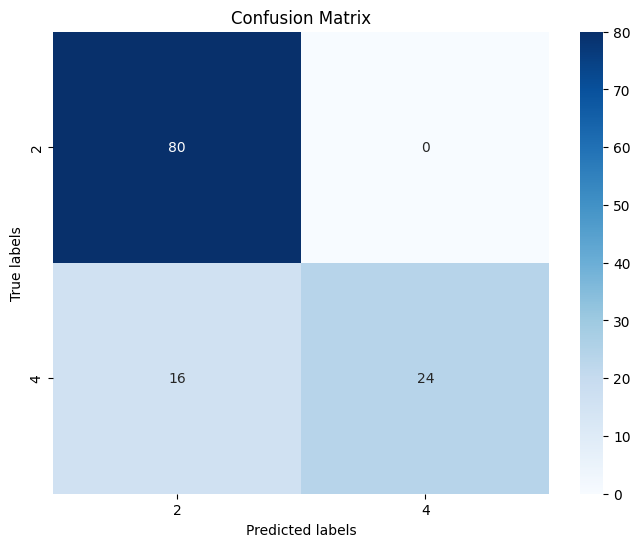

In [11]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['2', '4'], yticklabels=['2', '4'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy, Precision, and Recall

In [12]:
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, pos_label=4)
# recall = recall_score(y_test, y_pred, pos_label=4)


# calculationg the Accuracy, Precision, and Recall
true_positives = ((y_pred == 4) & (y_test == 4)).sum()
true_negatives = ((y_pred == 2) & (y_test == 2)).sum()
false_positives = ((y_pred == 4) & (y_test == 2)).sum()
false_negatives = ((y_pred == 2) & (y_test == 4)).sum()

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.8666666666666667
Precision: 1.0
Recall: 0.6


plot visualization for verifying

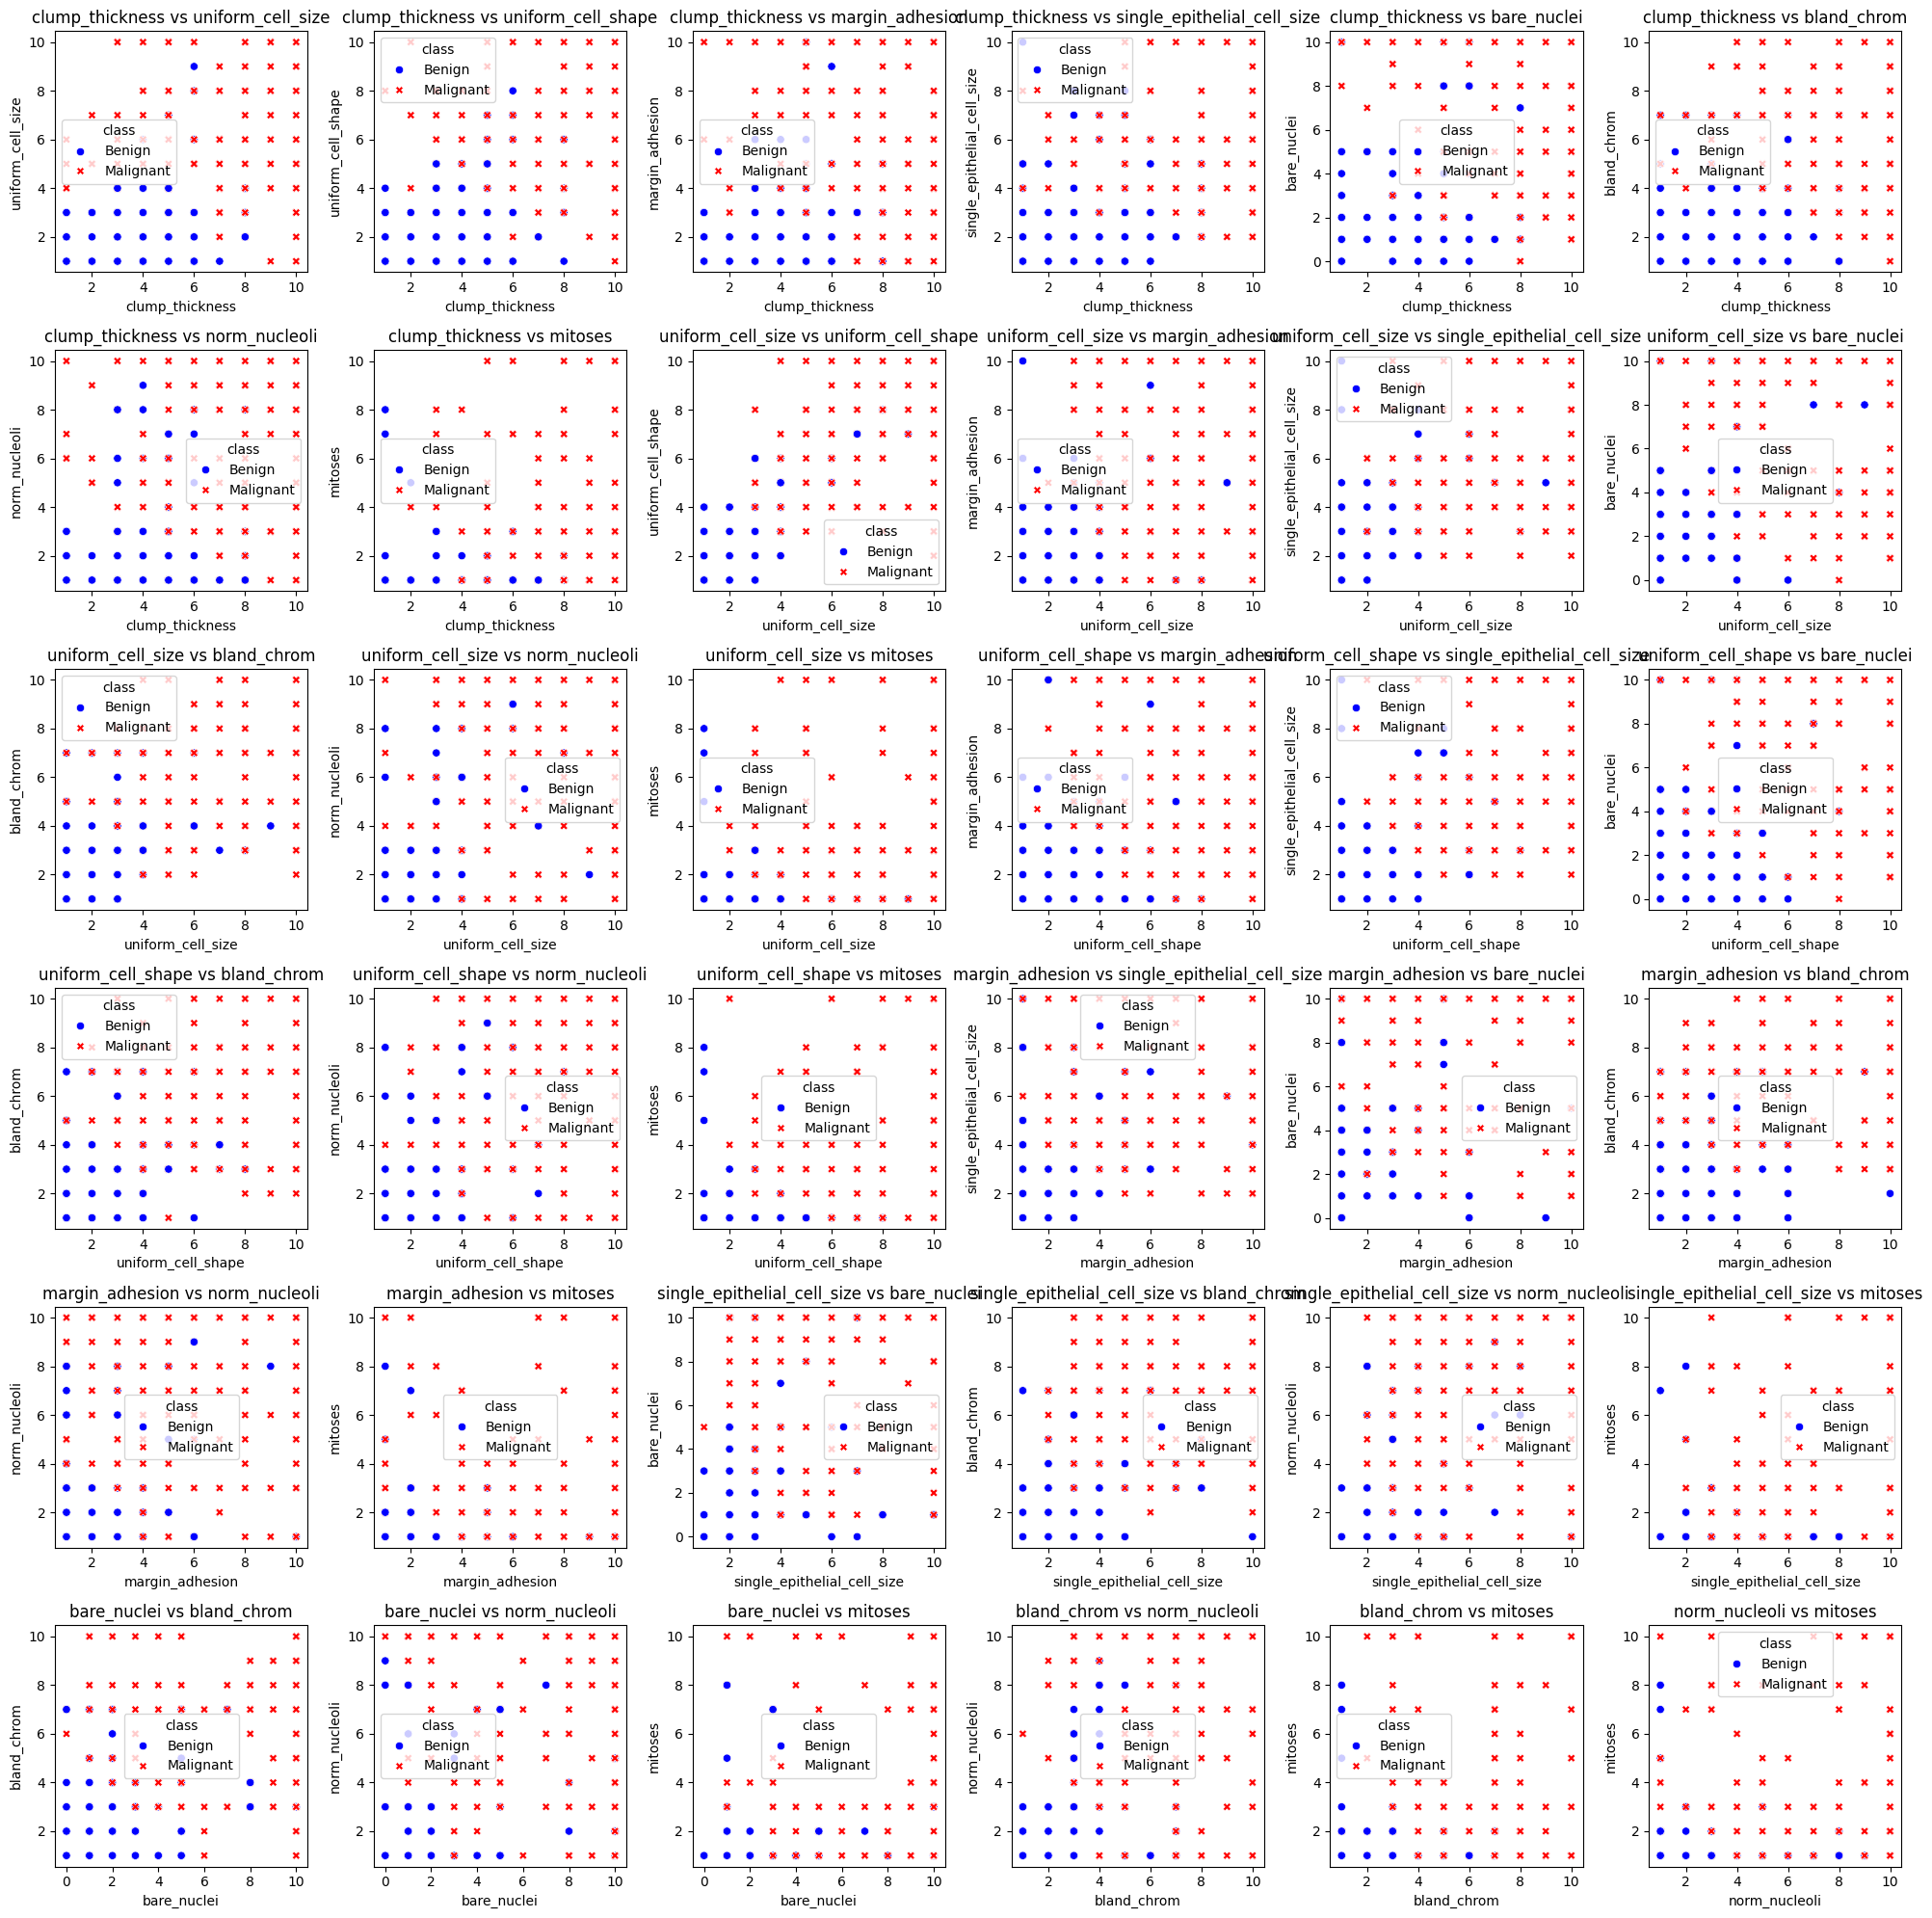

In [33]:
# filter the data for class 2 and 4
filtered_data = data[data['class'].isin([2, 4])]

# map class values to label
class_labels = {2: 'Benign', 4: 'Malignant'}
filtered_data['class'] = filtered_data['class'].map(class_labels)

# define the columns for scatter plot
columns = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'margin_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses']

# setup the figure for subplot
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# flatten the axes array
axs = axs.flatten()

# generate scatter plot
for i, (x, y) in enumerate(combinations(columns, 2)):
    sns.scatterplot(data=filtered_data, x=x, y=y, hue='class', style='class', palette={'Benign': 'blue', 'Malignant': 'red'}, ax=axs[i])
    axs[i].set_title(f'{x} vs {y}')
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)

# hide unused subplots
for ax in axs[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


because it take about 2TiB of ram memory for all the plots so i just show 2 plots: clump_thickness vs uniform_cell_size; and uniform_cell_size vs bare_nuclei

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


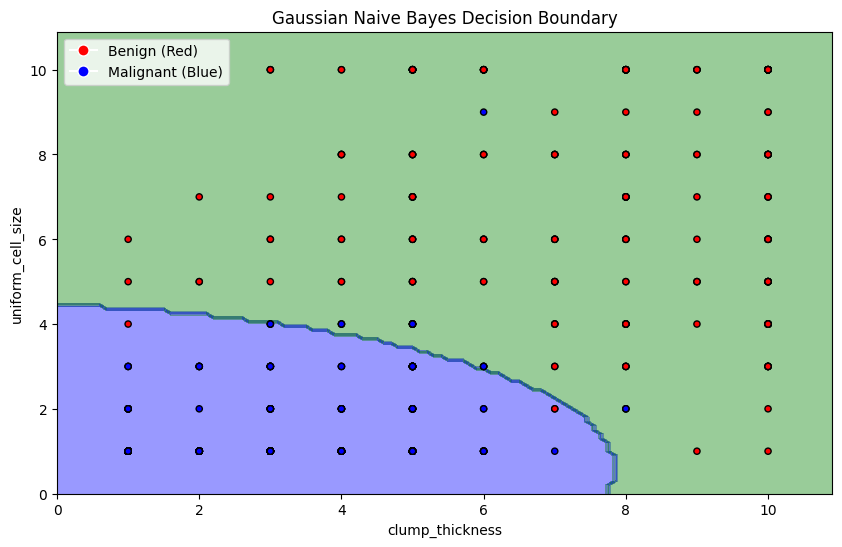

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


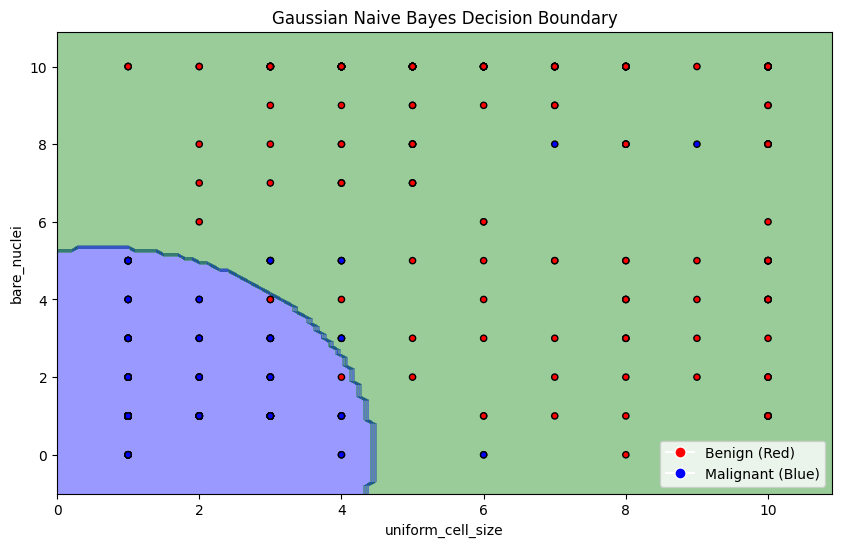

In [30]:
# plotting for plot: clump_thickness vs uniform_cell_size; uniform_cell_size vs bare_nuclei
features = ['clump_thickness', 'uniform_cell_size', 'bare_nuclei']
X = data[features]
y = data['class']

# train model with two features for visualization
for feature_pair in [('clump_thickness', 'uniform_cell_size'), ('uniform_cell_size', 'bare_nuclei')]:
    X_plot = X[list(feature_pair)]
    X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size=0.25, random_state=1)
    model_plot = GaussianNB()
    model_plot.fit(X_train_plot, y_train_plot)
    
    # create meshgrid
    x_min, x_max = X_plot.iloc[:, 0].min() - 1, X_plot.iloc[:, 0].max() + 1
    y_min, y_max = X_plot.iloc[:, 1].min() - 1, X_plot.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4,colors=['blue', 'green'])
    plt.scatter(X_plot.iloc[:, 0], X_plot.iloc[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr, marker='o')
    
    legend_labels = {'Benign (Red)': 'red', 'Malignant (Blue)': 'blue'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label) for label, color in legend_labels.items()]
    plt.legend(handles=handles)
    
    # plt.title(f'Gaussian Naive Bayes Decision Boundary for {feature_pair[0]} vs {feature_pair[1]}')
    plt.title(f'Gaussian Naive Bayes Decision Boundary')
    plt.xlabel(feature_pair[0])
    plt.ylabel(feature_pair[1])
    plt.show()